In [1]:
import os, glob, numpy as np, matplotlib.pyplot as plt, pandas as pd 
from tensorboard.backend.event_processing import event_accumulator 
from collections import defaultdict 

In [2]:
LOG_DIRS = ["./mpe_logs", "./cp_mpe_logs", "./new_cp_mpe_logs", "./cp-reps", "./env-search"] 
LOG_DIRS = ["./mpe_logs", "./cp-reps"] 
LOG_DIRS = ["./env-search"] 

SAVE_NUMPY = False 
SMOOTH = 500    

STORE_EVERYTHING_SIZE_GUIDANCE = {
    'compressedHistograms': 0, 
    'images': 0, 
    'audio': 0, 
    'scalars': 0, 
    'histograms': 0, 
} 

CUT = 90000    

In [3]:
def get_values(filename, scalar="Episodic_Reward"): 
    ea = event_accumulator.EventAccumulator(filename, size_guidance=STORE_EVERYTHING_SIZE_GUIDANCE)
    ea.Reload()
    # print(ea.Tags()) 
    ea_scalar = ea.Scalars(tag=scalar) 
    ea_scalar = pd.DataFrame(ea_scalar) 
    return ea_scalar 

In [4]:
if SAVE_NUMPY: 
    logs = glob.glob(os.path.join(LOG_DIRS[-1], "*/**/event*"), recursive=True) 
    for log in logs: 
        print(log) 
        vals = get_values(log, scalar="Episodic Return")['value'].to_numpy() 
        # vals = get_values(log, scalar="Episodic_Reward")['value'].to_numpy() 
        path = "/".join(log.split("/")[:-1]) 
        with open(path+'/arr.npy', 'wb') as f: 
            np.save(f, vals) 
        # break 

In [5]:
def smooth(y, box_pts=100):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    # return np.array(pd.Series(y).rolling(box_pts).mean()) 
    return y_smooth

In [6]:
logs = [] 
[logs.extend(glob.glob(os.path.join(log_dir, "*/**/*.npy"), recursive=True)) for log_dir in LOG_DIRS] 

exps = set() 
[exps.add("--".join(l.split("/")[-2].split("--")[:-1])) for l in logs] 
print(exps) 

# exps = [
#     item for item in exps 
#     if 
#     (('update_timestep' not in item) 
#     and ('cam_plus_other_obs' not in item)) 
# #     or ('update_timestep' in item) 
# #     and (int(item.split("--")[-1].split("_")[-1])<50)
# ]
# exps = [
#     item for item in exps 
#     if 'cam_new' not in item 
#     if 'cam_plus_other_obs' not in item 
#     and 'giam' not in item 
#     and 'noam' not in item 
# ]
# exps = [
#     item for item in exps 
#     if 'cam_new--n_2--cp_update_timestep_50' in item 
#     or 'cam_plus_other_obs--n_2--cp_update_timestep_20' in item 
#     or 'giam' in item 
#     or 'noam' in item 
# ]


{''}


exp: 
(126, 90000)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


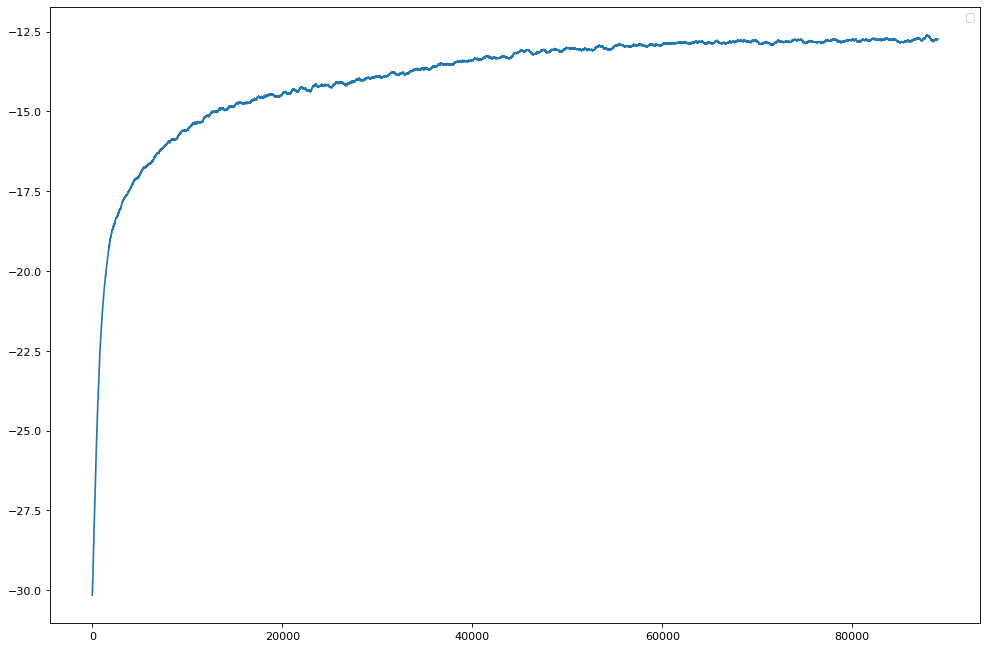

In [7]:
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80) 

vals = [] 
for e in exps: 
    print("exp:", e) 
    vals = [] 
    for l in logs: 
        if e in l: 
            x = np.load(l) 
            if (x.shape[0]>CUT): 
                vals.append(x[:CUT]) 
    vals = np.array(vals)
    print(vals.shape)
    val_means = smooth(np.mean(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
    val_stds = smooth(np.std(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
    plt.plot(val_means, label = e )
plt.legend() 
plt.show() 


In [8]:
exps 

{''}

{'noam--simple_world_comm_v2--n_2', 'noam--simple_speaker_listener_v3--n_2', 'noam--simple_push_v2--n_2', 'noam--simple_spread_v2--n_2', 'giam--simple_spread_v2--n_2', 'giam--simple_speaker_listener_v3--n_2', 'giam--simple_push_v2--n_2', 'giam--simple_world_comm_v2--n_2'}
{'simple_push_v2', 'simple_spread_v2', 'simple_speaker_listener_v3', 'simple_world_comm_v2'}
exp: noam--simple_push_v2--n_2
(21, 90000)
exp: giam--simple_push_v2--n_2
(21, 90000)


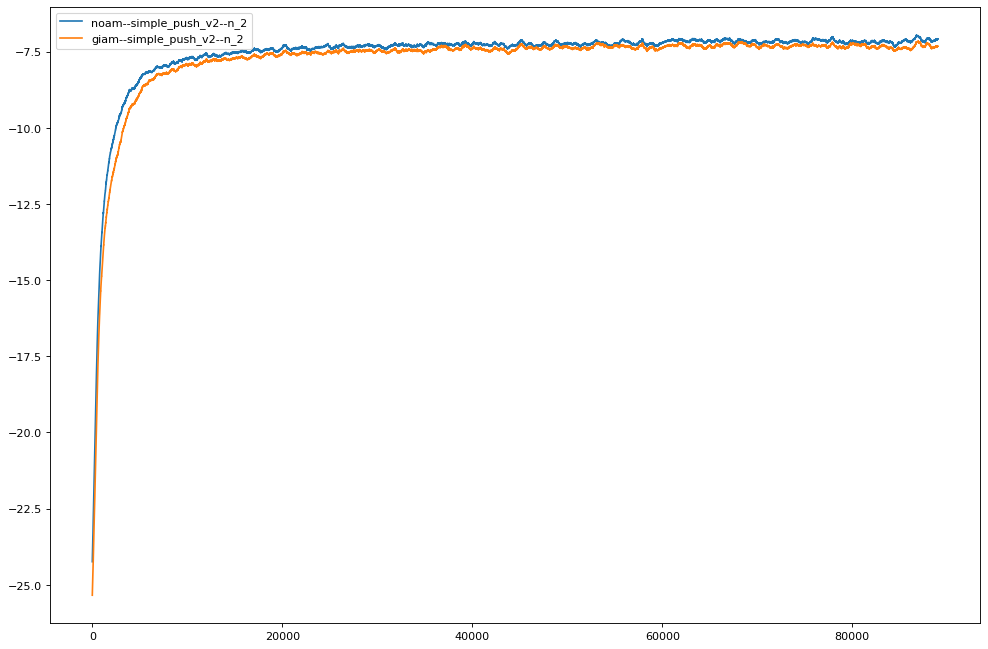

exp: noam--simple_spread_v2--n_2
(21, 90000)
exp: giam--simple_spread_v2--n_2
(21, 90000)


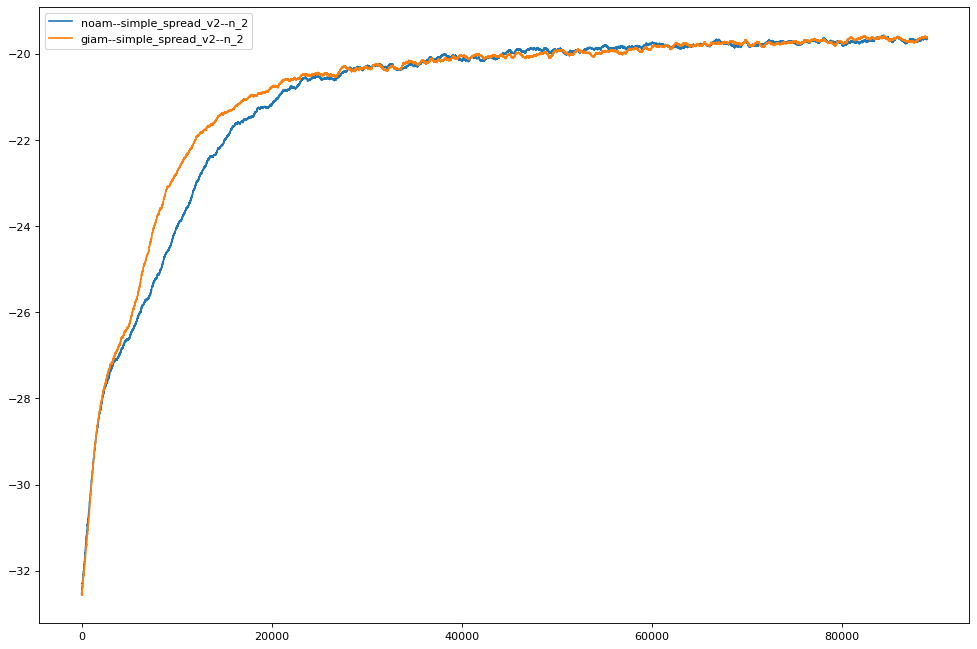

exp: noam--simple_speaker_listener_v3--n_2
(21, 90000)
exp: giam--simple_speaker_listener_v3--n_2
(21, 90000)


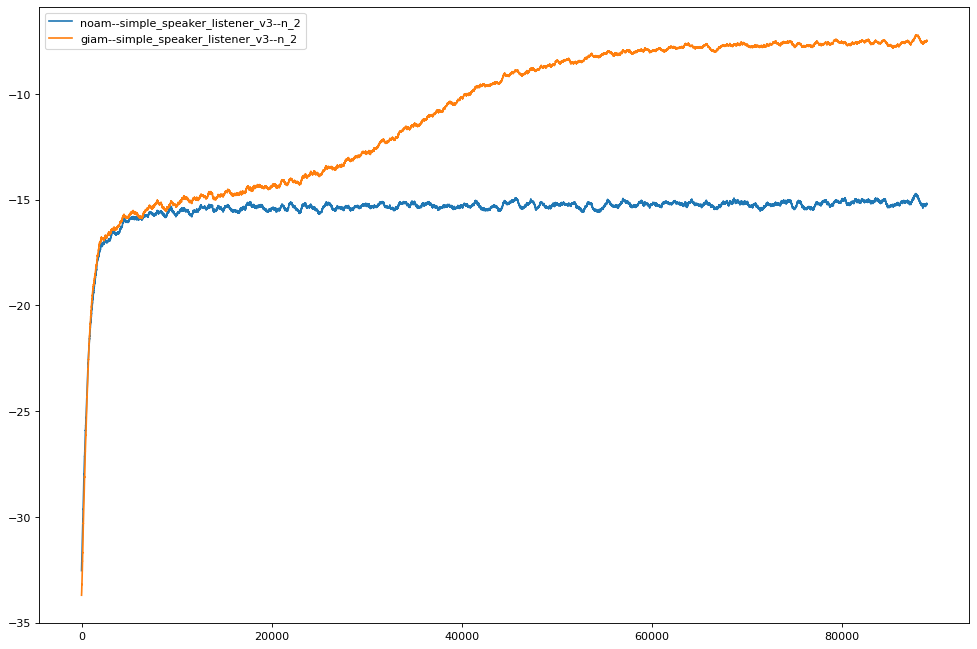

exp: noam--simple_world_comm_v2--n_2
(0,)
exp: giam--simple_world_comm_v2--n_2
(0,)


/Users/nikunjgupta/work/conformal-agent-modelling/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nikunjgupta/work/conformal-agent-modelling/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nikunjgupta/work/conformal-agent-modelling/venv/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/nikunjgupta/work/conformal-agent-modelling/venv/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/nikunjgupta/work/conformal-agent-modelling/venv/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: i

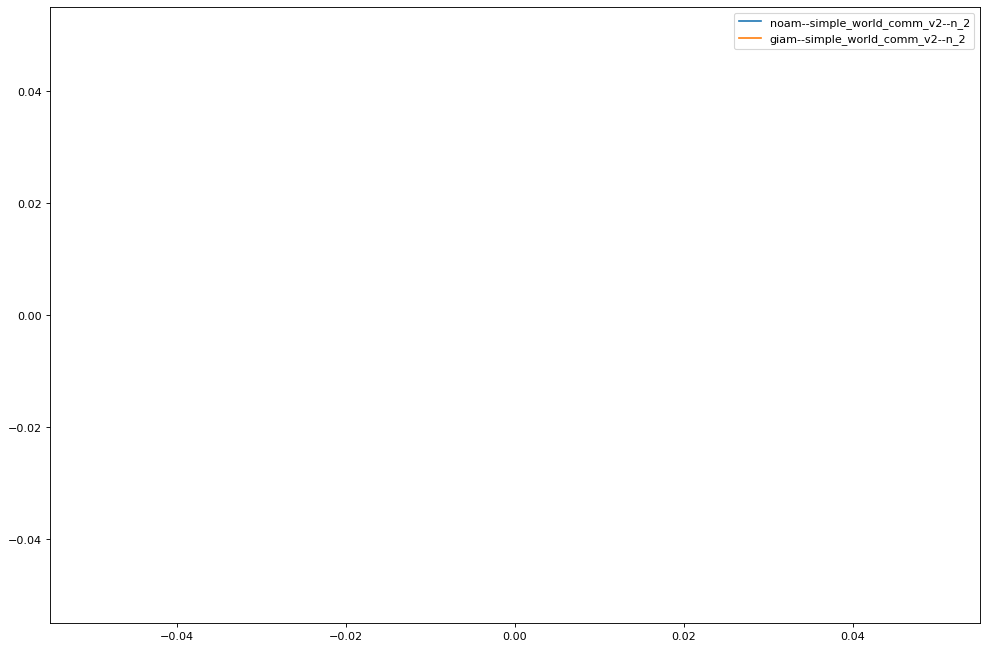

In [9]:
logs = [] 
[logs.extend(glob.glob(os.path.join(log_dir, "*/**/*.npy"), recursive=True)) for log_dir in LOG_DIRS] 

exps = set() 
[exps.add("--".join(l.split("/")[-3].split("--")[:-1])) for l in logs] 
print(exps) 

envs = set()
[envs.add(e.split("--")[1]) for e in exps]
print(envs) 

from matplotlib.pyplot import figure


vals = [] 
for env in envs: 
    figure(figsize=(15, 10), dpi=80) 
    for e in exps: 
        if env in e: 
            print("exp:", e) 
            vals = [] 
            for l in logs: 
                if e in l: 
                    x = np.load(l) 
                    if (x.shape[0]>CUT): 
                        vals.append(x[:CUT]) 
            vals = np.array(vals)
            print(vals.shape)
            val_means = smooth(np.mean(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
            val_stds = smooth(np.std(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
            plt.plot(val_means, label = e )
    plt.legend() 
    plt.show() 
    plt.close() 
